# IEEE-CIS Fraud Detection Part 2

In this series of notebooks, we are working on a supervised, regression machine learning problem. Using Kaggle's competition [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection) dataset, we want to predict whether a transaction is fraud or not. 

 ### Workflow 
 1. Understand the problem (we're almost there already)
 2. Exploratory Data Analysis
 3. Feature engineering to create a dataset for machine learning
 4. Create a baseline machine learning model
 5. Try more complex machine learning models
 6. Optimize the selected model
 7. Investigate model predictions in context of problem
 8. Draw conclusions and lay out next steps
 
The first notebook covered steps 1-3, and in this notebook, we will cover 4-8.

In [1]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics tools
import scipy.stats as stats

# Sklearn data clean
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Logistic Regression
from sklearn.linear_model import Lasso, LogisticRegression

# KNN Classifer 
from sklearn.neighbors import KNeighborsClassifier

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz

# Random Forests 
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# Evaluate
from sklearn import metrics
from sklearn.metrics import log_loss, f1_score,roc_auc_score, confusion_matrix, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Datetime
from datetime import datetime

# Import data
import warnings

Here, we will import two dataframes:
 - __df_le__: categorical variables were Label Encoded, designed for tree-based models
 - __df_db__: categorical variables were OneHotEncoded, designed for linear and distance dependent models

In [2]:
# List files available
df_le = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/clean_df_le.csv')
df_db = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/clean_df_db.csv')

In [3]:
# Display sizes of data
print('Df_le Training Feature Size: ', df_le.shape)
print('Df_db Training Feature Size: ', df_db.shape)

Df_le Training Feature Size:  (32902, 422)
Df_db Training Feature Size:  (32902, 509)


In [4]:
df_le.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_38,DeviceType,transaction_day_of_week,transaction_hour,average_trans_amt_for_card1,average_trans_amt_for_card4,average_id_02_for_card1,average_id_02_for_card4,P_major_email,R_major_email
0,0,107.950,4,12695,490.0,150.0,3,226.0,1,325.000000,...,0,0,6.0,23.0,NaN,NaN,1.033636,0.970722,15,15
1,0,25.000,1,12929,285.0,150.0,3,226.0,1,184.000000,...,1,1,1.0,17.0,1.160000,0.210830,1.000000,0.207972,1,1
2,0,57.950,4,9500,321.0,150.0,3,226.0,1,204.000000,...,0,0,4.0,22.0,0.396588,0.428929,1.006090,0.970722,15,15
3,0,100.000,1,12769,555.0,150.0,2,224.0,1,204.000000,...,0,0,5.0,17.0,NaN,NaN,1.000000,0.936085,15,15
4,1,32.356,0,12778,500.0,185.0,2,224.0,0,290.733794,...,0,0,5.0,23.0,1.090654,0.379163,3.187676,3.957320,15,15


In [5]:
df_db.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,R_major_email_q,R_major_email_rocketmail,R_major_email_sbcglobal,R_major_email_scranton,R_major_email_suddenlink,R_major_email_twc,R_major_email_verizon,R_major_email_web,R_major_email_yahoo,R_major_email_ymail
0,0,107.950,12695,490.0,150.0,226.0,325.000000,87.00000,11.00000,2.0,...,0,0,0,0,0,0,0,0,0,0
1,0,25.000,12929,285.0,150.0,226.0,184.000000,87.00000,118.50218,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,57.950,9500,321.0,150.0,226.0,204.000000,87.00000,6.00000,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,100.000,12769,555.0,150.0,224.0,204.000000,87.00000,118.50218,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,32.356,12778,500.0,185.0,224.0,290.733794,86.80063,118.50218,13.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Columns: 422 entries, isFraud to R_major_email
dtypes: float64(395), int64(27)
memory usage: 105.9 MB


In [7]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Columns: 509 entries, isFraud to R_major_email_ymail
dtypes: float64(395), int64(114)
memory usage: 127.8 MB


# Evaluating and Comparing Machine Learning Models
In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

## Split Train and Test set¶
Let's split dataset by using function train_test_split(). Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% data will be used for model training and 20% for model testing.

To continue feature selection, we will start by using the original attributes in the raw training set.

In [8]:
# X is the feature set
X_le = df_le.drop(labels=['isFraud'], axis=1)

# Y is the target variable
y_le = df_le['isFraud']

In [9]:
# df_le
X_train, X_test, y_train, y_test = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

In [10]:
X_le_train = X_train.values
X_le_test = X_test.values
y_le_train = y_train.values
y_le_test = y_test.values

In [11]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_le_train.shape, X_le_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_le_train.shape, y_le_test.shape)

X_shapes:
 X_train: X_test:
 (26321, 421) (6581, 421) 

Y_shapes:
 Y_train: Y_test:
 (26321,) (6581,)


In [12]:
# X is the feature set
X_db = df_db.drop(labels=['isFraud'], axis=1)
# Y is the target variable
y_db = df_db['isFraud']

In [13]:
# df_db
X_train, X_test, y_train, y_test = train_test_split(X_db, y_db, test_size=0.2, random_state=42)

In [14]:
X_db_train = X_train.values
X_db_test = X_test.values
y_db_train = y_train.values
y_db_test = y_test.values

In [15]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_db_train.shape, X_db_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_db_train.shape, y_db_test.shape)

X_shapes:
 X_train: X_test:
 (26321, 508) (6581, 508) 

Y_shapes:
 Y_train: Y_test:
 (26321,) (6581,)


### Imputing Missing Values Again
Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Imputing also helps to reduce bias due to missingness: ‘rather than deleting cases that are subject to item-nonresponse, the sample size is maintained resulting in a potentially higher efficiency than for case deletion'[Durrant](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146#).

Here, we will fill in missing values with the mean of the column.

In [16]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Train on the training features
imputer.fit(X_le_train)

# Transform both training data and testing data
X_le_train = imputer.transform(X_le_train)
X_le_test = imputer.transform(X_le_test)

In [17]:
print('Missing values in training features: ', np.sum(np.isnan(X_le_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_le_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [18]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_le_train)))
print(np.where(~np.isfinite(X_le_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [19]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Train on the training features
imputer.fit(X_db_train)

# Transform both training data and testing data
X_db_train = imputer.transform(X_db_train)
X_db_test = imputer.transform(X_db_test)

In [20]:
print('Missing values in training features: ', np.sum(np.isnan(X_db_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_db_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [21]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_db_train)))
print(np.where(~np.isfinite(X_db_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Scaling Features¶
The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear models and Tree based models do not require feature scaling. Other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. So we will only scale df_db since we will regularized logistic regression. 

In [22]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_db_train)

# Transform both the training and testing data
X_db_train = scaler.transform(X_db_train)
X_db_test = scaler.transform(X_db_test)

In [23]:
# Convert y to one-dimensional array (vector)
y_db_train = np.array(y_db_train).reshape((-1, ))
y_db_test = np.array(y_db_test).reshape((-1, ))

# Baseline 
For a naive baseline, we will use logistic regression to predict the probability of fraud occurrence. Unlike linear regression which gives continuous output, logistic regression provides a constant output in prediciting binary classes. If the probability 'p' is greater than 0.5, the data is labeled '1'. Probability less than 0.5 is labeled as '0'.

## Logistic Regression Implementation
First, we'll create the model and train the model and make predictions on the testing data.

### Selecting features using Lasso regularisation

Here, we will fit the model and feature selection together in one line of code. First, we specify the Logistic Regression model, and select Lasso (L1) as the penalty. Then, we will use the selectFromModel object from sklearn to select the features with non-zero coefficients.

In [24]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_db_train), y_db_train)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
# List of selected features
selected_feat = X_db.columns[(sel_.get_support())]

print('total features: {}'.format((X_db.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 508
selected features: 227
features with coefficients shrank to zero: 281


In [26]:
# Identifying removed features
removed_feats = X_db.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'dist1', 'C1', 'C2',
       ...
       'R_major_email_optonline', 'R_major_email_prodigy', 'R_major_email_q',
       'R_major_email_rocketmail', 'R_major_email_sbcglobal',
       'R_major_email_scranton', 'R_major_email_suddenlink',
       'R_major_email_twc', 'R_major_email_web', 'R_major_email_ymail'],
      dtype='object', length=281)

In [27]:
# Removing features from train and test set
X_train_selected = sel_.transform(X_db_train)
X_test_selected = sel_.transform(X_db_test)
X_train_selected.shape, X_test_selected.shape

((26321, 227), (6581, 227))

In [28]:
# Logisitic Regression 
start_time = datetime.now()

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train_selected, y_db_train)

# Predict on test set
y_pred=logreg.predict(X_test_selected)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_db_test, y_pred))
print(classification_report(y_db_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[2724  581]
 [ 905 2371]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      3305
           1       0.80      0.72      0.76      3276

   micro avg       0.77      0.77      0.77      6581
   macro avg       0.78      0.77      0.77      6581
weighted avg       0.78      0.77      0.77      6581


Duration: 0:00:02.947990


__Precision__: ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all transaction that are labeled as fraud, how many are actually fraud? High precision relates to the low false positive rate. 

__Recall (Sensitivity)__: ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the transaction that are truly fraud, how many did we label? 

__F1 score__: F1 Score is the weighted average of Precision and Recall. 

predictproba will give out the probabilities while predict will give the class value. Class value can be used wherever the evaluation metric is accuracy, recall, precision etc Whereas probabilities can be used wherever the evaluation metric is AUC, ROCAUC, MSE, MAE, RMSE [source](https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/)

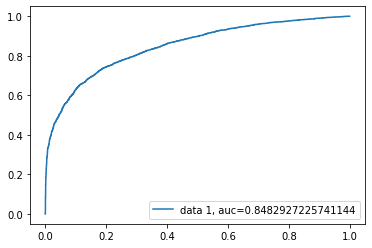

In [29]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_db_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_db_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
print(y_db_test.shape)
print(y_pred_proba.shape)

(6581,)
(6581,)


### Optimizing

In [30]:
#Optimizing Logistic Regression
parameters = {}
parameters['penalty'] = ['l1', 'l2']
parameters['tol'] = [1e-3, 1e-4, 1e-5]
parameters['C'] = [1, 1e-2, 1e-4]

gsc_lr = GridSearchCV(logreg, parameters, cv=5, scoring='roc_auc')
gsc_lr.fit(X_train_selected, y_db_train)
print(gsc_lr.best_params_, gsc_lr.best_score_)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

{'C': 1, 'penalty': 'l2', 'tol': 1e-05} 0.8530127574410966


In [32]:
#Optimized model with Logistic Regression
start_time = datetime.now()

lr_opt = LogisticRegression(C=1, penalty='l2', tol=1e-05)
lr_opt.fit(X_train_selected, y_db_train)
lr_opt_cvs = cross_val_score(lr_opt,X_train_selected, y_db_train, cv=5, scoring='roc_auc')
result = '%f (%f)' % (lr_opt_cvs.mean(), lr_opt_cvs.std())

# Return the performance metric
print('Optimized Logistic Regression Performance on the train set: ',result)

# Predict on test set
y_pred=lr_opt.predict(X_test_selected)

# Compute ROC AUC score, accuracy score, confusion matrix, and classification report
print(confusion_matrix(y_db_test, y_pred))
print(classification_report(y_db_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))
    

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Optimized Logistic Regression Performance on the train set:  0.853316 (0.006570)
[[2724  581]
 [ 905 2371]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      3305
           1       0.80      0.72      0.76      3276

   micro avg       0.77      0.77      0.77      6581
   macro avg       0.78      0.77      0.77      6581
weighted avg       0.78      0.77      0.77      6581


Duration: 0:00:37.237891


In [40]:
# ROC Curve
y_pred_prob = lr_opt.predict_proba(X_train_selected)[:, 1]
y_pred_proba2 = lr_opt.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_db_train, y_pred_proba)
fpr2, tpr2, thresholds = metrics.roc_curve(y_db_test, y_pred_proba2)

auc = metrics.roc_auc_score(y_db_train, y_pred_proba)
auc2 = metrics.roc_auc_score(y_db_test, y_pred_proba2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label="Train, auc="+str(auc))
ax.plot(fpr2, tpr2, label="Test, auc="+str(auc2))

plt.title('Optimized Logistic Regression ROC curve')
ax.legend(['Train set', 'Test set'], loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [26321, 6581]

In [34]:
y_db_train.shape

(26321,)

In [35]:
X_train_selected.shape

(26321, 227)

In [36]:
y_pred_prob.shape

(26321,)

## Improved Model: Random Forest
Let's try using a Random Forest on the same training data to see if it will beat the performance of our baseline. The Random Forest is a much more powerful model especially when we use hundreds of trees.

In [41]:
# Random Forest Classifer
start_time = datetime.now()

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the classifier
clf.fit(X_le_train, y_le_train)

y_pred=clf.predict(X_le_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[[2868  437]
 [ 594 2682]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3305
           1       0.86      0.82      0.84      3276

   micro avg       0.84      0.84      0.84      6581
   macro avg       0.84      0.84      0.84      6581
weighted avg       0.84      0.84      0.84      6581


Duration: 0:00:06.603930


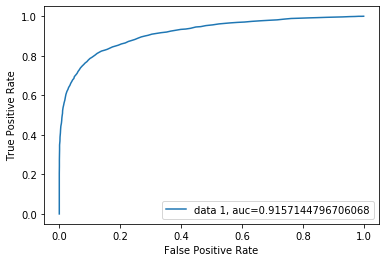

In [42]:
# ROC Curve
y_pred_proba = clf.predict_proba(X_le_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_le_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_le_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Model Interpretation: Feature Importances
As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. We may use these feature importances as a method of dimensionality reduction in future work.

In [43]:
# Top N importances
N = 10
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N

,Variable,Importance
0,TransactionAmt,0.025192
23,C13,0.021885
24,C14,0.019520
2,card1,0.019463
417,average_id_02_for_card1,0.018798
3,card2,0.017134
415,average_trans_amt_for_card1,0.016307
11,C1,0.015753
416,average_trans_amt_for_card4,0.015661
414,transaction_hour,0.014794


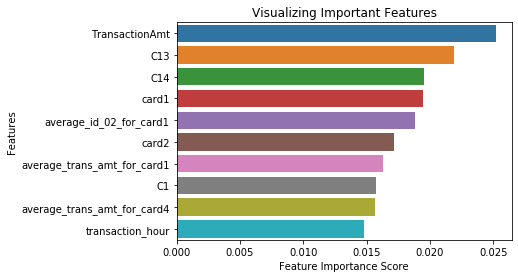

In [44]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [45]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.005
sfm = SelectFromModel(clf, threshold=0.005)

# Train the classifier
sfm.fit(X_le_train, y_le_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.005)

In [46]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_le_train)
X_important_test = sfm.transform(X_le_test)
X_important_train.shape, X_important_test.shape

((26321, 59), (6581, 59))

In [47]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_le_train)

y_pred = clf_important.predict(X_important_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[[2867  438]
 [ 597 2679]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3305
           1       0.86      0.82      0.84      3276

   micro avg       0.84      0.84      0.84      6581
   macro avg       0.84      0.84      0.84      6581
weighted avg       0.84      0.84      0.84      6581


Duration: 0:00:25.085651


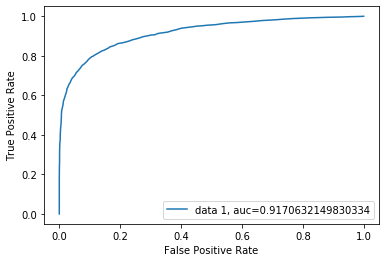

In [48]:
# ROC Curve
y_pred_proba = clf_important.predict_proba(X_important_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_le_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_le_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Looks like our selected importance features didn't have effect on the performance of the model. 

__Tuning__

In [50]:
#Optimizing Random Forest
parameters = {}
parameters['criterion'] = ['entropy','gini']
parameters['max_depth'] = [10, 100, 250, 500]
parameters['n_estimators'] = [5,10,20,30]

gsc_clf = GridSearchCV(clf, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_clf.fit(X_le_train, y_le_train)
print(gsc_clf.best_params_, gsc_clf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  4.5min finished


{'criterion': 'entropy', 'max_depth': 250, 'n_estimators': 30} 0.909397244318672


In [ ]:
#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250)
clf_opt.fit(X_le_train, y_le_train)
clf_opt_cvs = cross_val_score(clf_opt,X_le_train, y_le_train, cv=5, scoring='roc_auc')
result = '%f (%f)' % (clf_opt_cvs.mean(), clf_opt_cvs.std())

# Return the performance metric
print('Optimized Random Forest Classifier Performance on the train set: ',result)

# Predict on test set
y_pred=clf_opt.predict(X_le_test)

# Compute ROC AUC score, accuracy score, confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
#Optimizing Random Forest
parameters = {}
parameters['min_sample_leaf'] = [50, 100, 200]
parameters['min_samples_split'] = [10, 30, 50]
parameters['max_leaf_nodes'] = [2, 10, 50]

gsc_clf = GridSearchCV(clf_opt, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_clf.fit(X_le_train, y_le_train)
print(gsc_clf.best_params_, gsc_clf.best_score_)

In [ ]:
#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt2 = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250)
clf_opt2.fit(X_le_train, y_le_train)
clf_opt_cvs2 = cross_val_score(clf_opt,X_le_train, y_le_train, cv=5, scoring='roc_auc')
result = '%f (%f)' % (clf_opt_cvs2.mean(), clf_opt_cvs2.std())

# Return the performance metric
print('Optimized Random Forest Classifier Performance on the train set: ',result)

# Predict on test set
y_pred=clf_opt2.predict(X_le_test)

# Compute ROC AUC score, accuracy score, confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
# ROC Curve
y_pred_prob = clf_opt.predict_proba(X_le_train)[:, 1]
y_pred_proba2 = clf_opt.predict_proba(X_le_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_le_train, y_pred_proba)
fpr2, tpr2, _ = metrics.roc_curve(y_le_test, y_pred_proba2)

auc = metrics.roc_auc_score(y_le_train, y_pred_proba)
auc2 = metrics.roc_auc_score(y_le_test, y_pred_proba2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label="Train, auc="+str(auc))
ax.plot(fpr2, tpr2, label="Test, auc="+str(auc2))

plt.title('Optimized Random Forest ROC curve')
ax.legend(['Train set', 'Test set'], loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
best.fit(X_train,y_train)

y_pred_quant_2 = best.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_quant)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_quant_2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr_2, tpr_2)
ax.legend(['train set', 'test set'])


ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Gradient Boost

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)

# Train and fit
gb.fit(X_le_train, y_le_train)

y_pred = gb.predict(X_le_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
#Optimizing Boosting Classifer
parameters = {}
parameters['n_estimators'] = [10, 50, 100]
parameters['min_samples_split'] = [100, 500, 1000]
parameters['learning_rate'] = [0.05, 0.1, 0.2]

gsc_gb = GridSearchCV(gb, parameters, cv=5, scoring='roc_auc')
gsc_gb.fit(X_le_train, y_le_train)
print(gsc_gb.best_params_, gsc_gb.best_score_)


In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb_opt = GradientBoostingClassifier(random_state=42)

# Train and fit
gb_opt.fit(X_le_train, y_le_train)

y_pred = gb_opt.predict(X_le_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
#Optimizing Boosting Classifer
parameters = {}
parameters['max_depth'] = [2, 3, 4]
parameters['min_samples_leaf'] = [10, 30, 60]
parameters['max_features'] = [5,10,20]


gsc_gb2 = GridSearchCV(gb_opt, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_gb2.fit(X_le_train, y_le_train)
print(gsc_gb2.best_params_, gsc_gb2.best_score_)

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb_opt2 = GradientBoostingClassifier(random_state=42)

# Train and fit
gb_opt2.fit(X_le_train, y_le_train)

y_pred = gb_opt2.predict(X_le_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
#Optimizing Boosting Classifer
parameters = {}
parameters['subsample'] = [0.4, 0.6, 0.8]

gsc_gb3 = GridSearchCV(gb_opt2, parameters, cv=5, scoring='roc_auc')
gsc_gb3.fit(X_le_train, y_le_train)
print(gsc_gb3.best_params_, gsc_gb3.best_score_)

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb_opt3 = GradientBoostingClassifier(random_state=42)

# Train and fit
gb_opt3.fit(X_le_train, y_le_train)

y_pred = gb_opt3.predict(X_le_test)

# Compute confusion matrix, and classification report
print(confusion_matrix(y_le_test, y_pred))
print(classification_report(y_le_test, y_pred))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
# ROC Curve
y_pred_prob = gb_opt3.predict_proba(X_le_train)[:, 1]
y_pred_proba2 = gb_opt3.predict_proba(X_le_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_le_train, y_pred_proba)
fpr2, tpr2, _ = metrics.roc_curve(y_le_test, y_pred_proba2)

auc = metrics.roc_auc_score(y_le_train, y_pred_proba)
auc2 = metrics.roc_auc_score(y_le_test, y_pred_proba2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label="Train, auc="+str(auc))
ax.plot(fpr2, tpr2, label="Test, auc="+str(auc2))

plt.title('Optimized Random Forest ROC curve')
ax.legend(['Train set', 'Test set'], loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Baseline Model Results

After feature selection, the logistic regression model performly better than random guess with a ROC score of 0.84 on the test set.  Random forest with all features performed that best with a ROC score of 0.91 on the test set. With these results, we will move forward with only random forest. 

## Inital Models to Evaluate

We will compare five different machine learning models:

1. Random Forest Classifer
2. K-Nearest Neighbors Classifer
3. Support Vector Machine 
4. Gradient Boosting Classifer

We will fit these models the appropiate training set. 

In [ ]:
>>> from imblearn.ensemble import BalancedRandomForestClassifier
>>> from sklearn.datasets import make_classification
>>>
>>> X, y = make_classification(n_samples=1000, n_classes=3,
...                            n_informative=4, weights=[0.2, 0.3, 0.5],
...                            random_state=0)
>>> clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
>>> clf.fit(X, y)  # doctest: +ELLIPSIS
BalancedRandomForestClassifier(...)
>>> print(clf.feature_importances_)  # doctest: +ELLIPSIS
[...]
>>> print(clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
...                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))
[1]

In [ ]:
# Function to calculate roc auc probability score
def auc_prob(y_test, y_pred_proba):
    auc_prob = metrics.roc_auc_score(y_test, y_pred_proba)
    return auc_prob

# Check failure to flag fraud transaction 
#def true_pos(y_test, y_pred):
    #cm = confusion_matrix(y_test, y_pred)
    # Calculate precision
    #tp = ((cm[1][1])/sum(cm[1])*100)
    #return tp

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X_train, y_train, X_test, y_test):
    
    #fit the moodel
    model.fit(X_train, y_train)
    
    # Predict probabilities 
    y_pred = model.predict(X_test)
    
    # Keep probabilities for the positive outcome only
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate AUC
    auc = auc_prob(y_test, y_pred_proba)
    result = '%f'%(auc)
    
    # Calculate False Negatives
    #tp = true_pos(y_test, y_pred)
    
   
    # Compute confusion matrix, and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
   
    
    # Return the performance metric
    return result
    

In [ ]:
# Random Forest Classifer
start_time = datetime.now()

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc_score = fit_and_evaluate(rfc, X_le_train, y_le_train, X_le_test, y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

print('Random Forest Classifier Performance on the test set: ROC = {}'.format(rfc_score))

In [ ]:
# KNN Classifer 
start_time = datetime.now()

knn = KNeighborsClassifier(n_neighbors=10)
knn_score = fit_and_evaluate(knn, X_db_train, y_db_train, X_db_test, y_db_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

print('KNeighbors Classifier Performance on the test set: ROC = {}'.format(knn_score))

In [ ]:
# Support Vector Classifer
start_time = datetime.now()

smv = SVC(C = 1000, gamma = 0.1)
svm_score = fit_and_evaluate(smv,X_db_train, y_db_train, X_db_test, y_db_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

print('Support Vector Classifier Performance on the test set: ROC = {}'.format(svm_score))

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)
gb_score = fit_and_evaluate(gb, X_le_train, y_le_train, X_le_test, y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

print('Gradient Boosting Classifier Performance on the test set: ROC = {}'.format(gb_score))

In [ ]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'Model': ['RandomForest Classifier','KNeighbors Classifier','Support Vector Classifer', 'Gradient Boosting Classifier'],
                                 'ROC_AUC': [rfc_score, knn_score, svm_score, gb_score]})

# Horizontal bar chart of test ROC
model_comparison.sort_values('ROC_AUC', ascending = False)

In [ ]:
# Horizontal bar chart of test ROC
model_comparison.sort_values('ROC_AUC', ascending = False).plot(x = 'Model', y = 'ROC_AUC', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')


# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('ROC_AUC'); plt.xticks(size = 14)
plt.title('Model Comparison on Test ROC_AUC', size = 20);

##  Inital Model Results
We'll drop Navie Classifer, Support Vector Classifer, and KNN Classifer for poor performance and high variance.


## Models to Evaluate 

In this section, we'll optimize each model using GridSearchCV.

1. Random Forest Classifer 
2. Gradient Boosting Classifer
3. Extreme Gradient Boosting Classifer 

### Random Forest

__Tuning__

The ROC score on the training set was 91%, but then dropped to 83% on the testing set. This might have been due to overfitting. The predicted probability on the testing set went up to 91% again. This is an improvement from the inital model that had a score of 89% on the training data. 

## Results



# Future Work
* More feature engineering
    - Transaction Amount 
    - Card 
    - Count 
    - Time
    - Address
* Utilize different imbalanced class techniques
* Impute Add2 
* Time-series analyses